In [1]:
#正規性の検定
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.stats as stats
from scipy.stats import skewtest, kurtosistest

#%matplotlib notebook

ModuleNotFoundError: No module named 'seaborn'

In [2]:
#フォント設定
plt.rcParams['font.family'] = 'Times New Roman' # font familyの設定
#plt.rcParams['mathtext.fontset'] = 'stix' # math fontの設定
plt.rcParams["font.size"] = 15 # 全体のフォントサイズが変更されます。
#plt.rcParams['xtick.labelsize'] = 9 # 軸だけ変更されます。
#plt.rcParams['ytick.labelsize'] = 24 # 軸だけ変更されます


#軸設定
plt.rcParams['xtick.direction'] = 'in' #x軸の目盛りの向き
plt.rcParams['ytick.direction'] = 'in' #y軸の目盛りの向き

#軸大きさ
#plt.rcParams["xtick.major.width"] = 1.0             #x軸主目盛り線の線幅
#plt.rcParams["ytick.major.width"] = 1.0             #y軸主目盛り線の線幅
#plt.rcParams["xtick.minor.width"] = 1.0             #x軸補助目盛り線の線幅
#plt.rcParams["ytick.minor.width"] = 1.0             #y軸補助目盛り線の線幅
#plt.rcParams["xtick.major.size"] = 10               #x軸主目盛り線の長さ
#plt.rcParams["ytick.major.size"] = 10               #y軸主目盛り線の長さ
#plt.rcParams["xtick.minor.size"] = 5                #x軸補助目盛り線の長さ
#plt.rcParams["ytick.minor.size"] = 5                #y軸補助目盛り線の長さ
#plt.rcParams["axes.linewidth"] = 1.0                #囲みの太さ

#凡例設定
plt.rcParams["legend.fancybox"] = False  # 丸角OFF
plt.rcParams["legend.framealpha"] = 1  # 透明度の指定、0で塗りつぶしなし
plt.rcParams["legend.edgecolor"] = 'black'  # edgeの色を変更
plt.rcParams["legend.markerscale"] = 5 #markerサイズの倍率

In [3]:
df = pd.read_csv('BarGraph_correlation_coefficient_for_trial-to-trial_comparison.csv')
#dfの先頭から5行を確認
df.head()

,No,Kp_1,Ki_1,Kd_1,|Kp|_1,Ki/|Kp|_1,Kd/|Kp|_1,Average number of shares purchased_1,Total number of shares purchased_1,Average stock price at time of purchase_1,...,Average stock price at time of purchase_4,Stock price range at time of purchase_4,Average stock price change rate at time of purchase_4,Average stock price change rate at time of purchase_2_4 days ago,Average number of shares sold_4,Total number of shares sold_4,Average stock price at time of sale_4,Stock price range at time of sale_4,Average stock price change rate at time of sale_4,Average stock price change rate at time of sale_2 days_4 ago
0,1,-0.082637,-0.006627,-0.001133,0.082637,-0.080194,-0.013711,20.833333,500,2207.600000,...,4498.600000,706,-7.480185,-8.641327,4.166667,100,5062.000,0,8.208636,8.000000
1,2,-0.288025,0.020760,-0.000657,0.288025,0.072077,-0.002281,79.166667,1900,2075.111111,...,4610.142857,808,-10.647825,-12.009461,83.333333,2000,5813.125,1798,16.190842,15.019241
2,3,-0.154286,-0.006566,0.000052,0.154286,-0.042557,0.000337,29.166667,700,2366.250000,...,4577.000000,408,-15.230556,-16.078372,29.166667,700,5697.800,1678,8.131216,8.072987
3,4,-0.118005,-0.021221,-0.007106,0.118005,-0.179831,-0.060218,108.333333,2600,2263.000000,...,4616.166667,808,-13.827142,-13.970503,50.000000,1200,6018.000,1798,18.288428,17.313800
4,5,-0.023689,0.016359,0.000351,0.023689,0.690574,0.014817,29.166667,700,2210.000000,...,4651.500000,624,-12.455246,-12.263887,12.500000,300,6014.000,1636,5.742273,5.829815


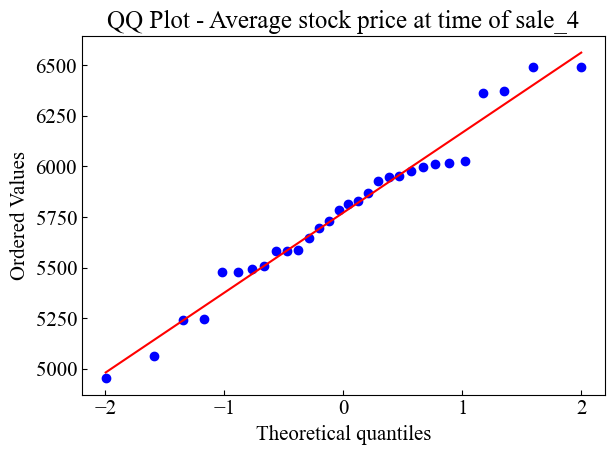

In [55]:
# Q-Qプロットの描画
stats.probplot(df['Average stock price at time of sale_4'], dist="norm", plot=plt)
# グラフにタイトルを追加
plt.title('QQ Plot - Average stock price at time of sale_4')
plt.tight_layout()
plt.savefig("QQ_Ave_AtockPrice_at-time-of-sale_4.png")
plt.show()

In [50]:
#シャピロウィルク検定
W, shapiro_p_value = stats.shapiro(df['Average stock price at time of sale_1'])
print(f'Shapiro-Wilk test statistic: {W}, p-value: {shapiro_p_value}')
# 通常の有意水準（例: 0.05）を設定
alpha = 0.05

# p値が有意水準よりも小さい場合、帰無仮説を棄却
if shapiro_p_value < alpha:
    print(f'帰無仮説を棄却: データは正規分布に従っていません')
else:
    print('帰無仮説を採択: データは正規分布に従っています')

Shapiro-Wilk test statistic: 0.9703848361968994, p-value: 0.5497580766677856
帰無仮説を採択: データは正規分布に従っています


In [42]:
# オムニバス検定の実行
k2, omnibus_p_value = stats.normaltest(df['Average stock price at time of purchase_2'])
print(f'Omnibus test statistic: {k2}, p-value: {omnibus_p_value}')
# 通常の有意水準（例: 0.05）を設定
alpha = 0.05

# p値が有意水準よりも小さい場合、帰無仮説を棄却
if omnibus_p_value < alpha:
    print(f'帰無仮説を棄却: データは正規分布に従っていません')
else:
    print('帰無仮説を採択: データは正規分布に従っています')

Omnibus test statistic: nan, p-value: nan
帰無仮説を採択: データは正規分布に従っています


In [1]:

import pandas as pd
from scipy.stats import shapiro
data = pd.read_csv('For_Transaction_data_Comparison.csv')

# 結果を格納するリストの初期化
results = []
kp_columns = ['Max_purchase_num_1', 'Max_purchase_num_2', 'Max_purchase_num_3', 'Max_purchase_num_4']
ki_columns = ['Max_disposal_num_1', 'Max_disposal_num_2', 'Max_disposal_num_3', 'Max_disposal_num_4']
'''kd_columns = ['Med stock price change rate at time of purchase_1', 'Med stock price change rate at time of purchase_2', 
            'Med stock price change rate at time of purchase_3', 'Med stock price change rate at time of purchase_4']
k_columns = ['Med stock price change rate at time of sale_1', 'Med stock price change rate at time of sale_2',
            'Med stock price change rate at time of sale_3', 'Med stock price change rate at time of sale_4']'''
#    'Med_purchase_num',
#    'Med_disposal_num',
#Med stock price change rate at time of sale
#Med stock price change rate at time of purchase
#'Median of the purchased quantity of stocks (shares)',
    #'Median of the sold quantity of stocks (shares)',
    #'Median percentage change in stock price at buy(%)'
    #'Median percentage change in stock price at sale(%)'
# 各列に対してシャピロ–ウィルク検定を実行
def run_shapiro_test(columns, prefix):
    for column in columns:
        stat, p_value = shapiro(data[column])
        
        # 棄却されるかどうかの判定
        rejected = 'Yes' if p_value < 0.05 else 'No'
        
        # 結果をリストに追加
        results.append([f"{prefix}_{column}", stat, p_value, rejected])

# 各列に対してシャピロ–ウィルク検定を実行
run_shapiro_test(kp_columns, 'Max of the purchased quantity of stocks (shares)')
run_shapiro_test(ki_columns, 'Max of the sold quantity of stocks (shares)')
#run_shapiro_test(kd_columns, 'Median percentage change in stock price at buy (%)')
#run_shapiro_test(k_columns, 'Median percentage change in stock price at sale (%)')

# 結果をデータフレームに変換
results_df = pd.DataFrame(results, columns=['Column', 'Stat', 'P-value', 'Rejected'])

# 結果をCSVファイルに保存
output_csv_path = '卒論用2/TRA_shapiro_test_results_max.csv'
results_df.to_csv(output_csv_path, index=False)

print("シャピロ–ウィルク検定の結果が '{}' に保存されました。".format(output_csv_path))

シャピロ–ウィルク検定の結果が '卒論用2/TRA_shapiro_test_results_max.csv' に保存されました。
